# SF-DAT-21 | Unit Project 4

In this project, you will summarize and present your analysis from Unit Projects 1-3.

### Question 1. Introduction: Write a problem Statement/Specific Aim for this project.

Answer:
We explore the association between a) Admit and b) GRE, GPA, and Prestige (f(GRE, GPA, Prestige) = Admit).  We try to determine which UCLA applications are more likely to yield admission (admit = 1), using applicant information (GRE, GPA, High School Prestige) from 400 UCLA applicants.  Specifically, we create a data dictionary, visualize the data, and create logistic regression models to predict likelihood of admission.  



### Question 2. Dataset: Write up a description of your data and any cleaning that was completed.

Answer:
400 observations (applications).  2 `gre`, 2 `gpa`, and 1 `prestige` value were `NULL`, so those records were dropped with `df = df_raw.dropna()`

`admit` is a categorial/binary variable always 0 (rejected) or 1(accepted). Wait listed students are excluded. It is assumed that their decisions have been made final at time of data collection (rejected or accepted).

`gre` is a discrete variable between 200 and 800, integral values only (min 220, max 800 in dataset)

`gpa` is a continuous variable between 2 and 4. (min 2.26, max 4 in dataset)

`prestige` is a discrete varible between 1 and 4. Assuming 1 is best 4 is worst.

### Question 3. Demo: Provide a table that explains the data by admission status.

In [38]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from sklearn import linear_model, neighbors, cross_validation, grid_search    

%matplotlib inline

In [9]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
df = df_raw.dropna()

df.groupby(['admit', 'prestige']).describe()

gpa         gre
admit prestige                             
0     1        count  28.000000   28.000000
               mean    3.345714  582.857143
               std     0.375445  126.574737
               min     2.550000  340.000000
               25%     3.135000  510.000000
               50%     3.280000  580.000000
               75%     3.577500  685.000000
               max     4.000000  800.000000
      2        count  95.000000   95.000000
               mean    3.325895  588.000000
               std     0.376339  103.323495
               min     2.420000  380.000000
               25%     3.070000  520.000000
               50%     3.350000  580.000000
               75%     3.585000  660.000000
               max     4.000000  800.000000
      3        count  93.000000   93.000000
               mean    3.402258  562.365591
               std     0.379434  124.650798
               min     2.560000  220.000000
               25%     3.140000  500.000000
               50%     3.400000  560.000000
               75%     3.690000  640.000000
               max     4.000000  800.000000
      4        count  55.000000   55.000000
               mean    3.291455  562.909091
               std     0.369767  116.327646
               min     2.260000  300.000000
               25%     3.050000  500.000000
               50%     3.310000  560.000000
...                         ...         ...
1     1        std     0.385511  110.618098
               min     2.420000  460.000000
               25%     3.370000  540.000000
               50%     3.610000  620.000000
               75%     3.810000  720.000000
               max     4.000000  800.000000
      2        count  53.000000   53.000000
               mean    3.441698  612.075472
               std     0.365054  113.635018
               min     2.620000  300.000000
               25%     3.170000  540.000000
               50%     3.450000  620.000000
               75%     3.750000  680.000000
               max     4.000000  800.000000
      3        count  28.000000   28.000000
               mean    3.534643  616.428571
               std     0.399244   99.785484
               min     2.650000  460.000000
               25%     3.342500  535.000000
               50%     3.620000  620.000000
               75%     3.862500  680.000000
               max     4.000000  800.000000
      4        count  12.000000   12.000000
               mean    3.441667  603.333333
               std     0.297286  114.680056
               min     2.860000  400.000000
               25%     3.220000  520.000000
               50%     3.535000  610.000000
               75%     3.662500  685.000000
               max     3.740000  780.000000

[64 rows x 2 columns]

In [12]:
df.groupby('admit')['prestige'].value_counts()
pd.crosstab(df.admit, df.prestige)

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


Mean (STD) or counts by admission status for each variable
(this is just copy/paste from 2 cells above)

| Not Admitted | Admitted
---| ---|---
GPA | mean(std) | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

### Question 4. Methods: Write up the methods used in your analysis.

Answer:
Initial exploration: check counts, drop/account for `NULL`, boxplots, histograms, `df.describe()`, `df.corr()`, frequency tables (`df.groupby('admit')['prestige'].value_counts()`)
Logistic Regression: model probability of admission based on binary yes/no prestige_1, ..., prestige_4

### Question 5. Results: Write up your results.

Answer:
Odds ratio for prestige 1 greater than 1 implies that going to a #1 ranked college is associated with admission.
Odds ratio for prestige 4 less than 1 implies that prestige level 4 is not associated/more likely to get into grad school/admission

### Question 6. Visuals: Provide a table or visualization of these results.

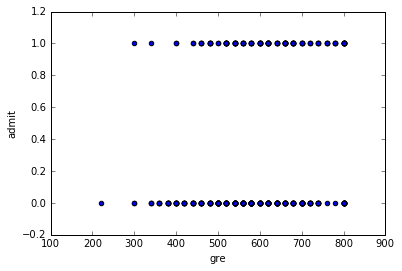

In [34]:
# data scatter plots
df.plot.scatter(y='admit', x='gre')

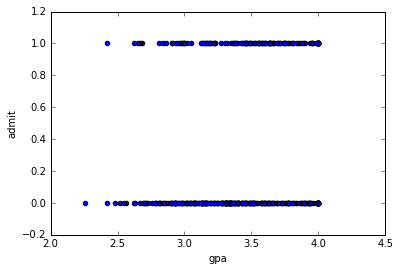

In [35]:
df.plot.scatter(y='admit', x='gpa')

In [15]:
pd.crosstab(df.admit, df.prestige)

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


In [17]:
dummy_ranks = pd.get_dummies(df.prestige, prefix = 'prestige')
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

   admit  gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380  3.61             0             0             1             0
1      1  660  3.67             0             0             1             0
2      1  800  4.00             1             0             0             0
3      1  640  3.19             0             0             0             1
4      0  520  2.93             0             0             0             1


<img src='assets/placeholder.png' height= 25% width= 25%>

In [18]:
pd.crosstab(handCalc['prestige_1.0'], handCalc.admit)

admit,0,1
prestige_1.0,,
0,243,93
1,28,33


In [23]:
# I'm interepreting this as "prestige 1.0 is a #1 ranked college.  admission to grad school is defined as admit == 1"
prob_1 = 33.0 / (33.0+28.0) #54.1%
odds_1 = 33.0 / ((33.0+28.0) - 33.0)
prob_not_1 = 93.0 / (93.0+243.0)   #27.7%
odds_not_1 = 93.0 / (93.0+243.0 - 93.0)   

print prob_1, odds_1
print "Prestige 1 OR = {0}".format(odds_1 / odds_not_1)

0.540983606557 1.17857142857
Prestige 1 OR = 3.07949308756


<img src='assets/placeholder.png' height= 25% width= 25%>

In [25]:
prob_4 = 12. / (12. + 55.) 
odds_4 = 12. / (12. + 55. - 12.) 

prob_not_4 = 114. / (114. + 216.)
odds_not_4 = 114. / (114. + 216. - 114.)

print prob_4, odds_4
print "Prestige 4 OR = {0}".format(odds_4 / odds_not_4)

0.179104477612 0.218181818182
Prestige 4 OR = 0.413397129187


In [39]:
#also created logistic regression models for prestige 2(should do this for each prestige level)
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])
# manually add the intercept
data['intercept'] = 1.0
#train_cols = data[ ['admit', 'gre', 'gpa']]  #original version
train_cols = ['gre', 'gpa', 'prestige_2.0']

def X_y(df):
    X = df[ train_cols]
    y = df['admit']
    return X, y

train_data = data.sample(frac = .6, random_state = 0)
test_data = data.drop(train_data.index)

train_X, train_y = X_y(train_data)
test_X, test_y = X_y(test_data)

model_prestige2 = linear_model.LogisticRegression()
model_prestige2.fit(train_X, train_y)

print "raw v1 training err: {0}".format(model_prestige2.score(train_X, train_y))
print "cv training err: {0}".format(cross_validation.cross_val_score(model_prestige2, train_X, train_y, cv = 10).mean())
print "generalization err: {0}".format(model_prestige2.score(test_X, test_y))
print 'intercept    =', model_prestige2.intercept_
print 'coefficients =', model_prestige2.coef_

raw v1 training err: 0.663865546218
cv training err: 0.663637681159
generalization err: 0.691823899371
intercept    = [-2.16610361]
coefficients = [[ 0.00263522 -0.01342274  0.14164604]]


### Logistic Regression Model Takeaways:
The above model implies that gre improves the likelihood of admission, GPA actually hurts likelihood of admission, and that atending a prestige 2 school improves probability of admission by 14.2%

### Question 7. Discussion: Write up your discussion and future steps.

Answer:
Should try diff models (minimize CV training err), try transforming data, test other prestige levels.  Would want to write function to test all permutations in one go.